In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import os

import warnings
warnings.filterwarnings('ignore')

In [16]:
with_mask = os.listdir('with_mask')

In [18]:
print(with_mask[-5:])

['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [20]:
 len(with_mask)

3725

In [22]:
without_mask = os.listdir('without_mask')

In [24]:
print(without_mask[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [26]:
print(without_mask[-5:])

['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [28]:
 len(without_mask)

3828

In [30]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [32]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [34]:
without_mask_labels[0:5]

[0, 0, 0, 0, 0]

In [36]:
labels = with_mask_labels + without_mask_labels

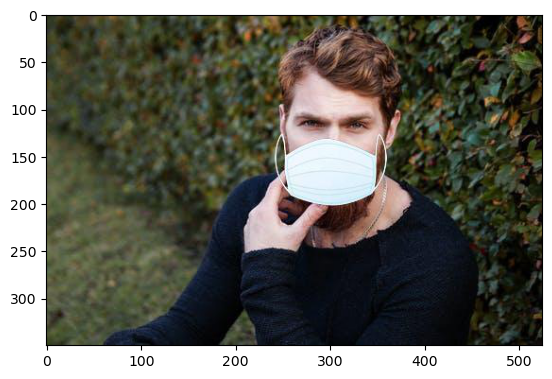

In [38]:
img = mpimg.imread('with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

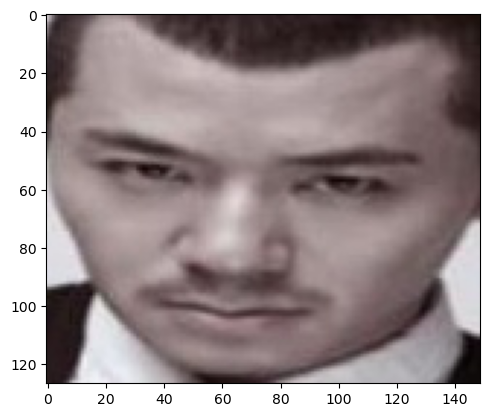

In [41]:
img = mpimg.imread('without_mask/without_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

In [43]:
with_mask_path ="with_mask/"

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = 'without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [45]:
type(data)

list

In [47]:
data[10]

array([[[170, 164, 166],
        [177, 171, 173],
        [179, 173, 175],
        ...,
        [154, 152, 157],
        [169, 167, 172],
        [178, 176, 181]],

       [[179, 173, 175],
        [183, 177, 179],
        [185, 179, 181],
        ...,
        [132, 130, 134],
        [123, 121, 125],
        [127, 125, 129]],

       [[188, 180, 183],
        [191, 183, 186],
        [182, 175, 177],
        ...,
        [213, 211, 214],
        [184, 182, 185],
        [158, 156, 159]],

       ...,

       [[ 18,  16,  17],
        [ 18,  16,  17],
        [ 18,  16,  17],
        ...,
        [ 71,  48,  48],
        [ 84,  61,  63],
        [117,  94,  97]],

       [[ 18,  16,  17],
        [ 18,  16,  17],
        [ 18,  16,  17],
        ...,
        [ 76,  52,  50],
        [ 96,  72,  71],
        [131, 107, 108]],

       [[ 18,  16,  17],
        [ 18,  16,  17],
        [ 18,  16,  17],
        ...,
        [ 85,  60,  57],
        [ 99,  73,  73],
        [128, 104, 104]]

In [49]:
data[10].shape


(128, 128, 3)

In [51]:
x = np.array(data)
y = np.array(labels)

In [55]:
type(x)

numpy.ndarray

## Modeling

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [61]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [65]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [67]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [69]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 58s 324ms/step - acc: 0.6920 - loss: 0.7270 - val_acc: 0.8744 - val_loss: 0.2770
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 54s 320ms/step - acc: 0.8855 - loss: 0.2865 - val_acc: 0.9124 - val_loss: 0.2229
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 54s 320ms/step - acc: 0.8946 - loss: 0.2942 - val_acc: 0.8860 - val_loss: 0.2635
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 55s 321ms/step - acc: 0.9034 - loss: 0.2328 - val_acc: 0.9372 - val_loss: 0.2010
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 54s 319ms/step - acc: 0.9279 - loss: 0.1877 - val_acc: 0.9207 - val_loss: 0.2401
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 55s 322ms/step - acc: 0.9326 - loss: 0.1589 - val_acc: 0.9388 - val_loss: 0.1966
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 55s 322ms/step - acc: 0.9422 - loss: 0.1529 - val_acc: 0.9405 - val_loss: 0.1995
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 55s 323ms/step - acc: 0.9471 - loss: 0.1266 - val_acc: 0.9091 - val_loss: 0.2557
Epoch 9/10
170/170 ━━━━━━━━━━━━━

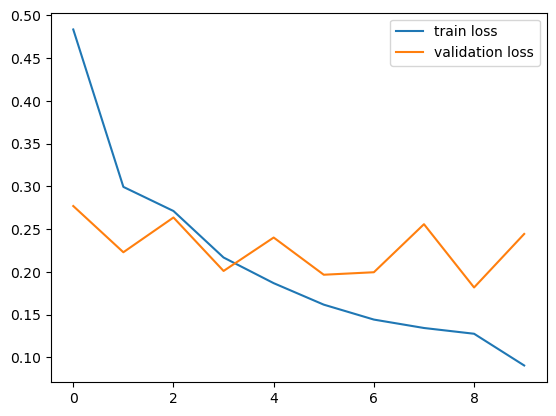

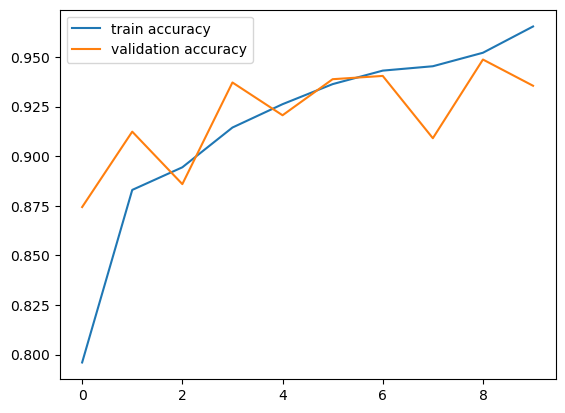

In [71]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

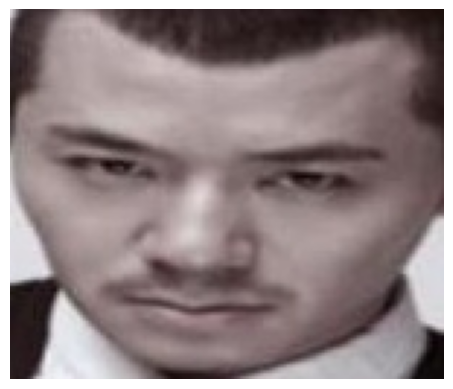

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.56947005 0.25756449]]
0
The person in the image is not wearing a mask


In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


input_image_path = "without_mask/without_mask_100.jpg"

input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image not found. Please check the path.")
else:
    
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    plt.imshow(input_image_rgb)
    plt.axis('off')  
    plt.show()


    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    input_prediction = model.predict(input_image_reshaped)
    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')
